Unable to revert mtime: /Library/Fonts
/Users/dvasoya/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


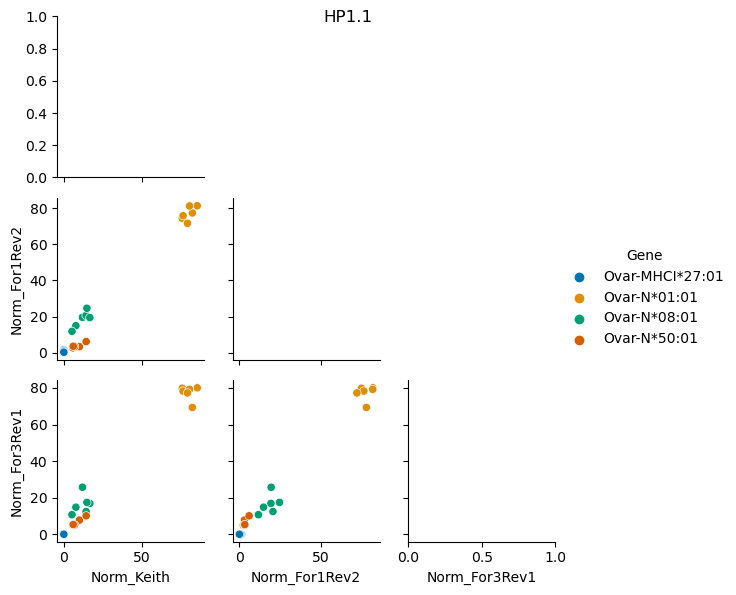

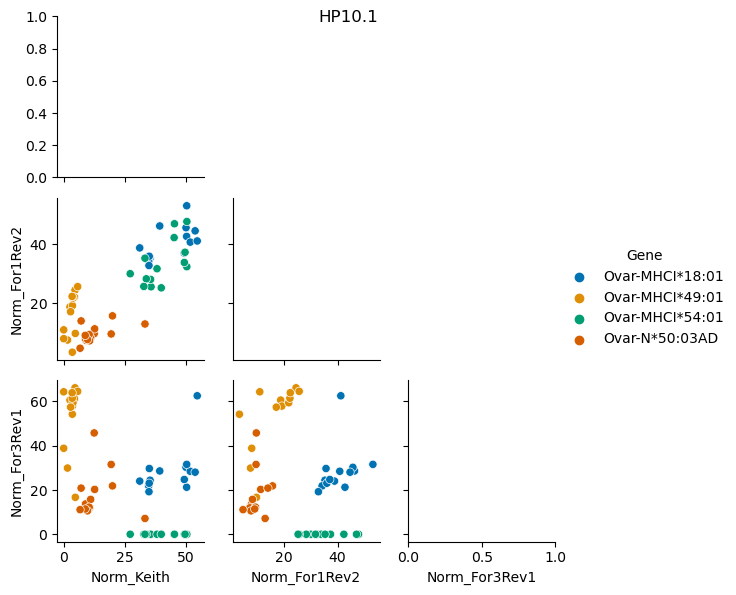

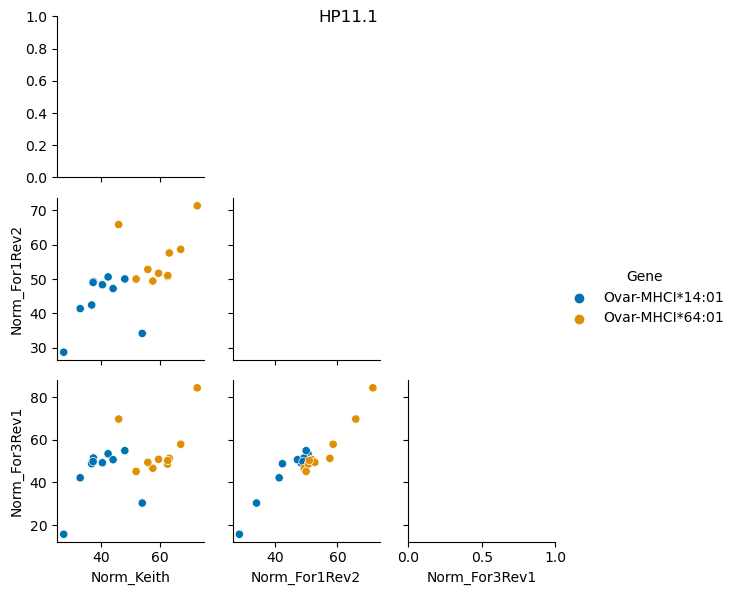

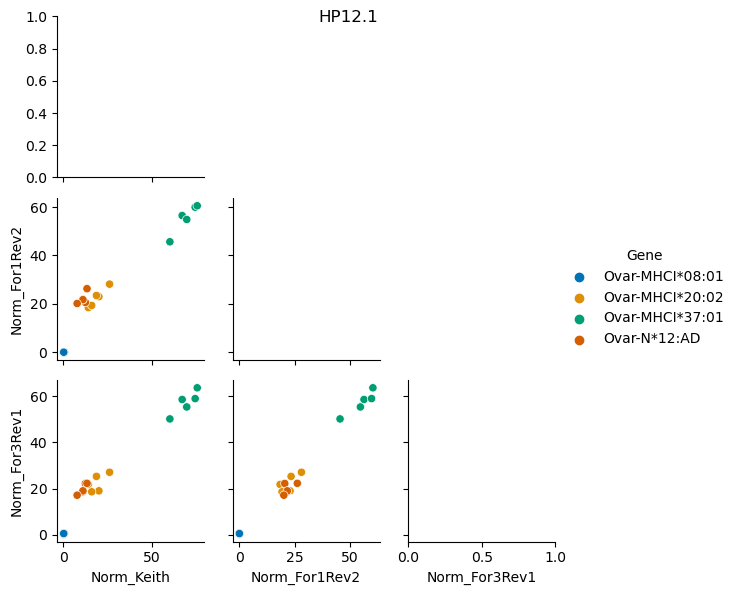

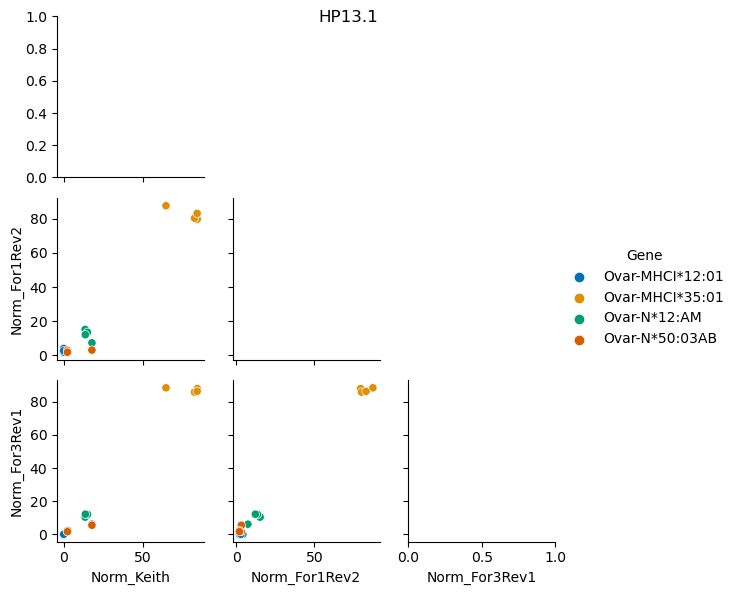

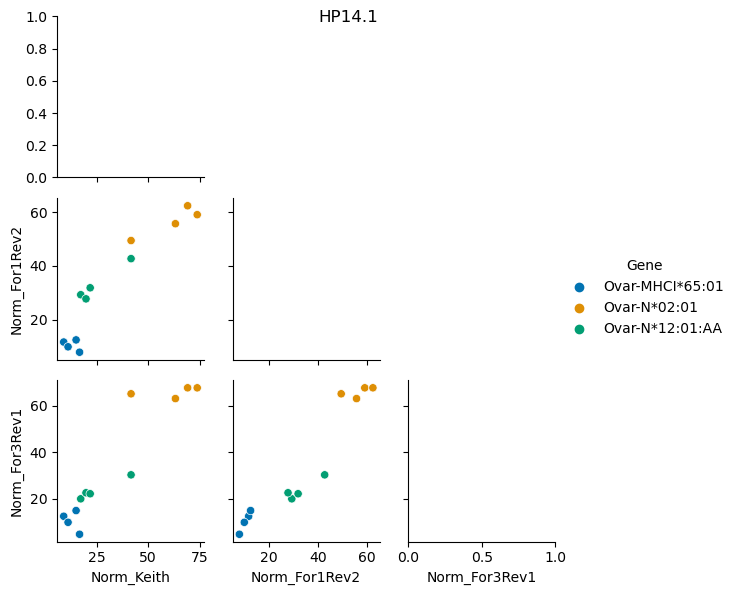

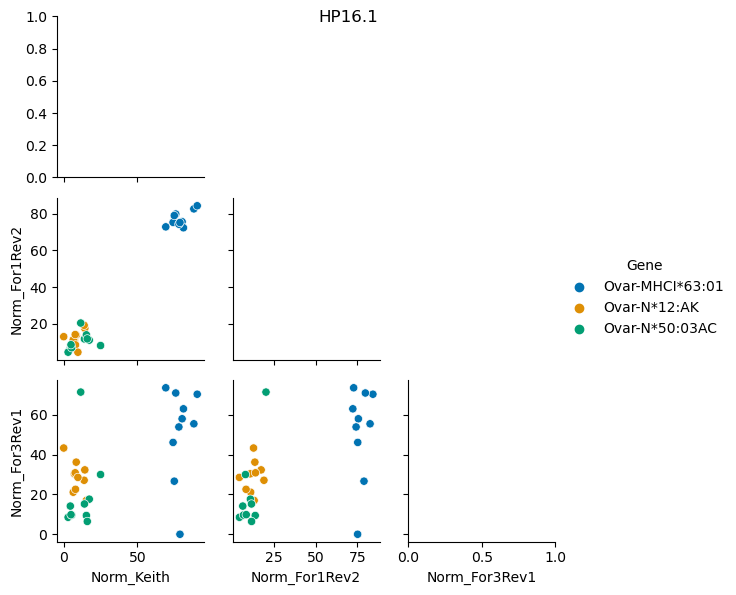

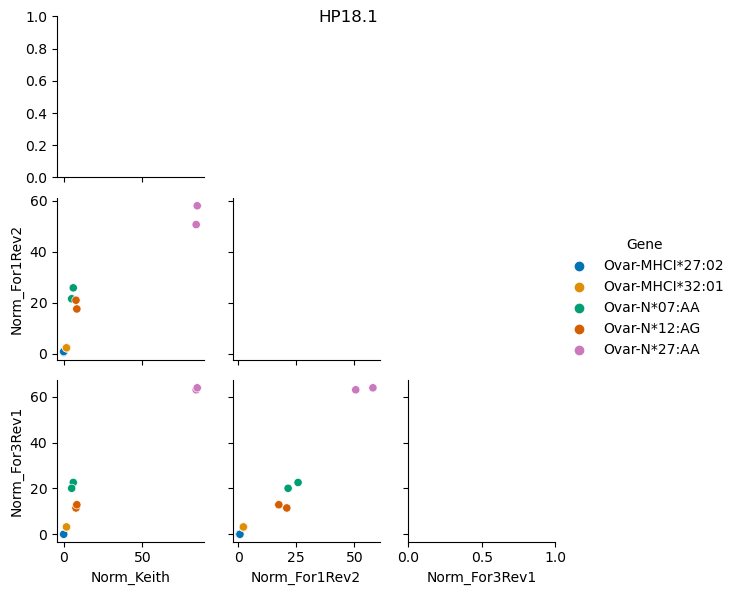

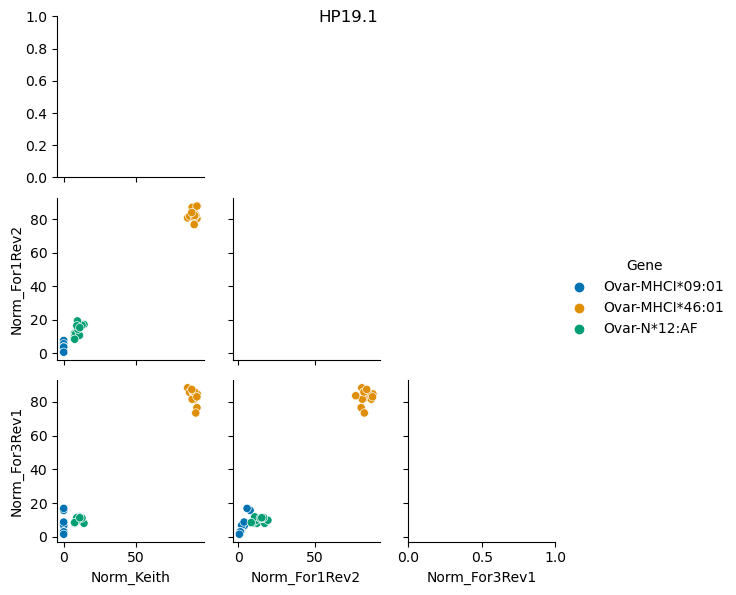

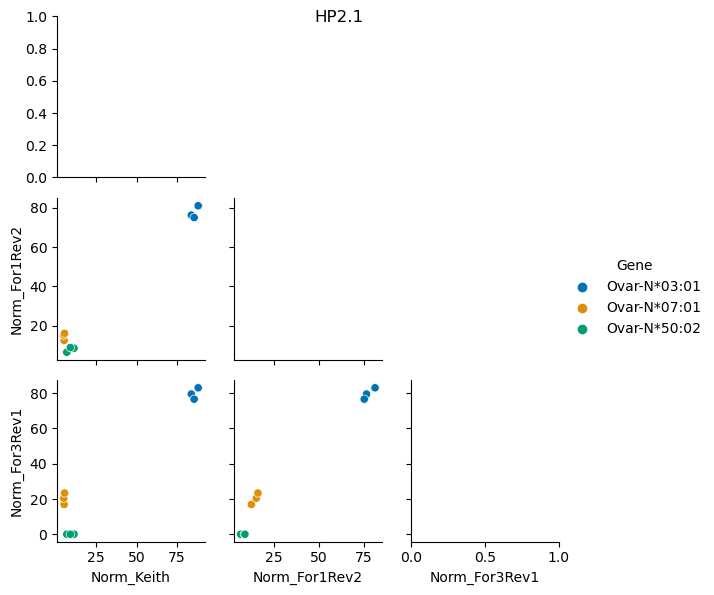

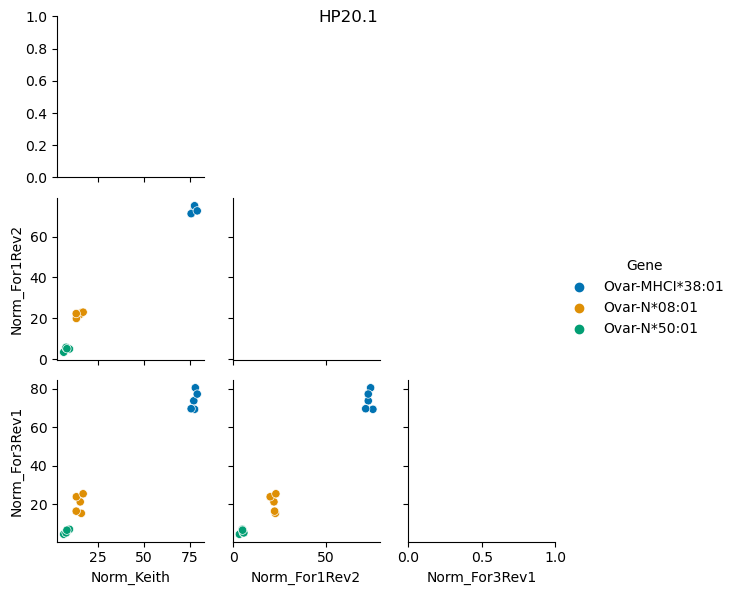

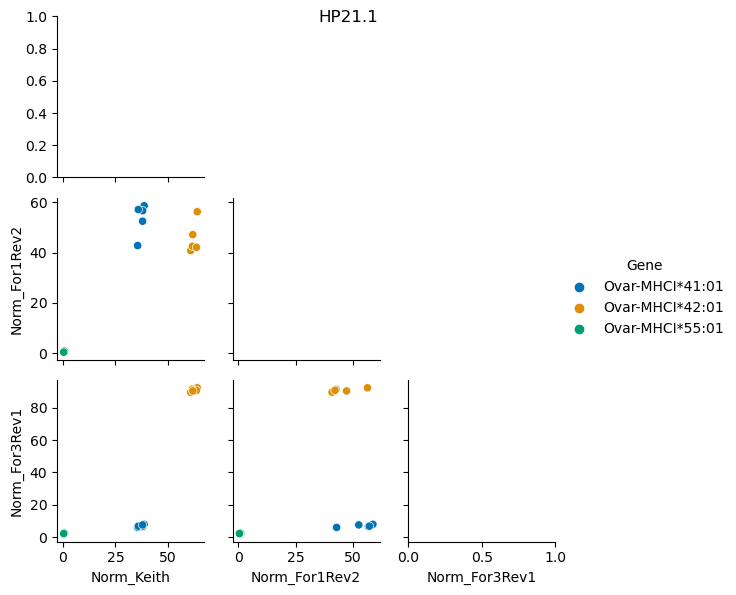

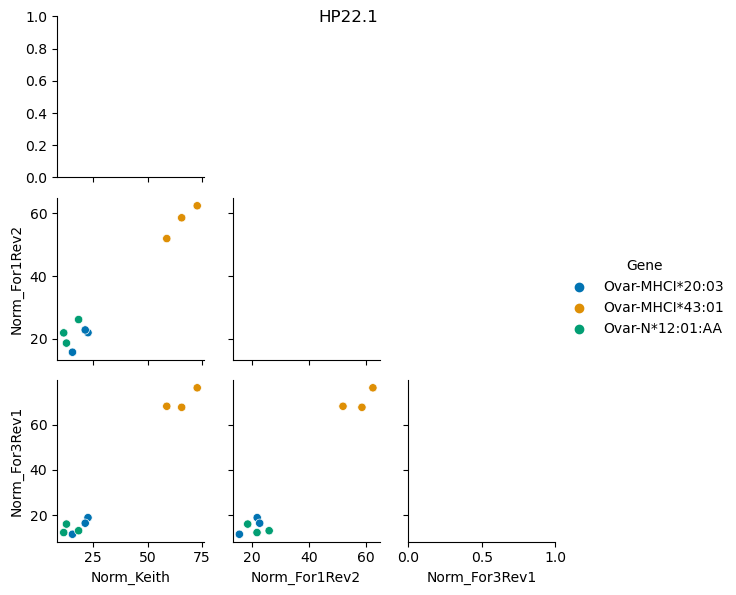

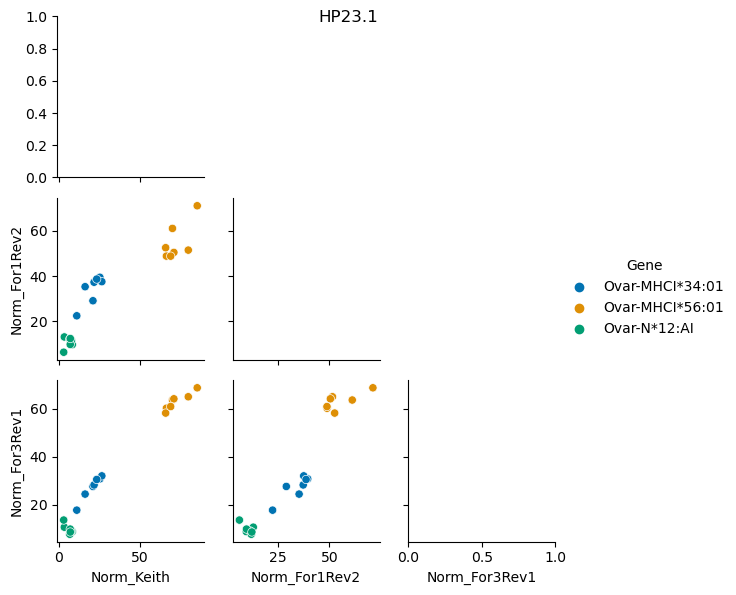

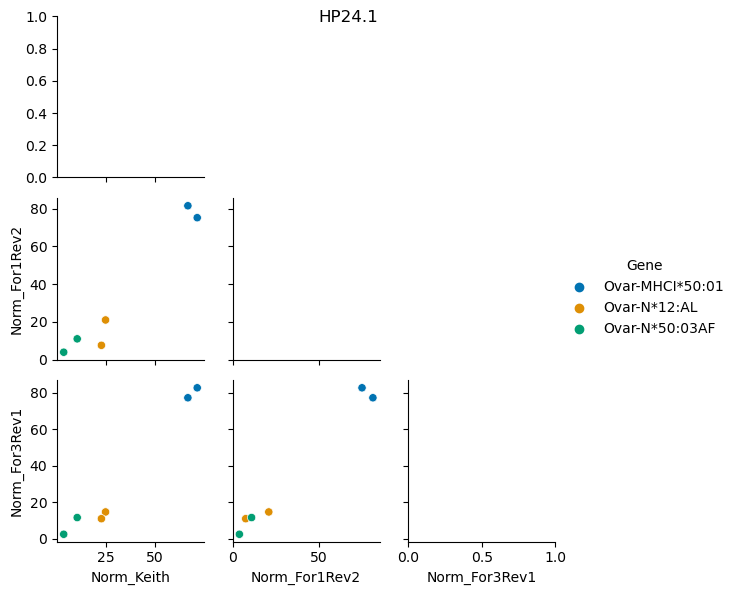

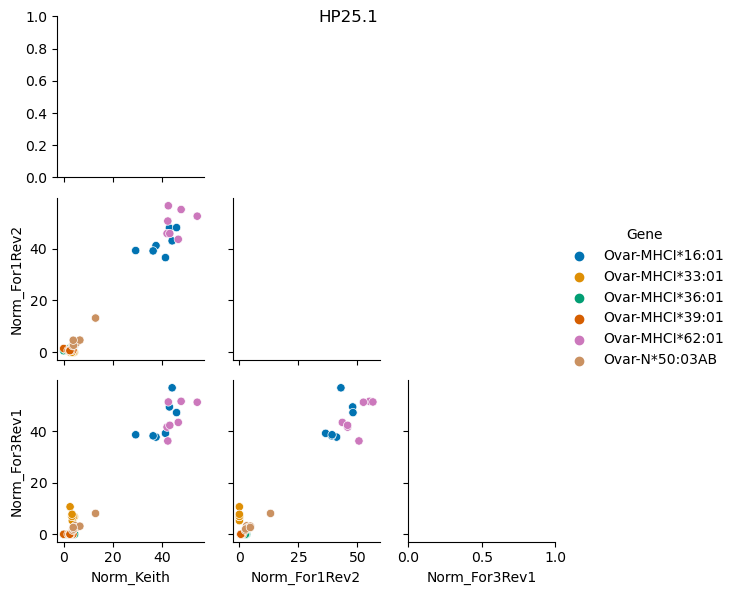

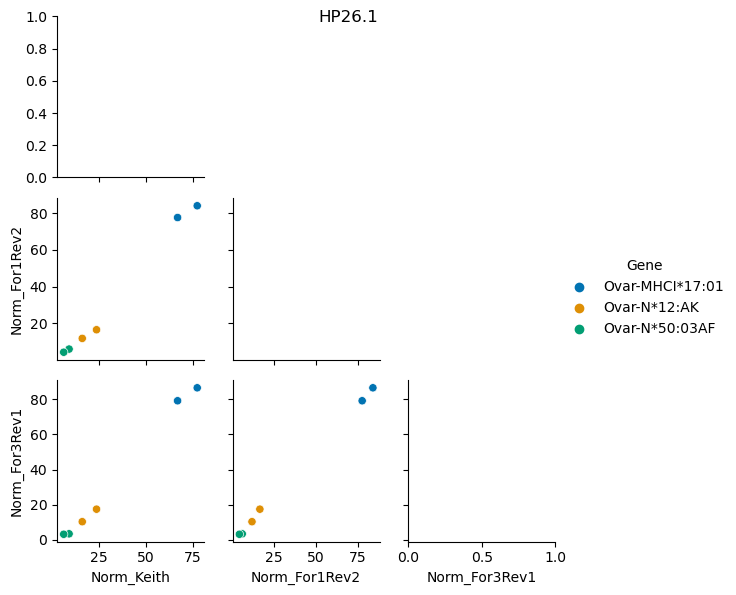

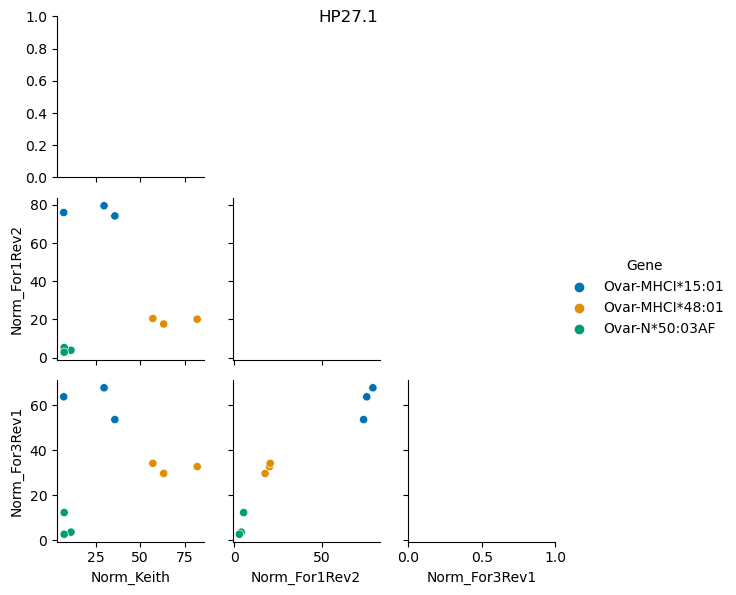

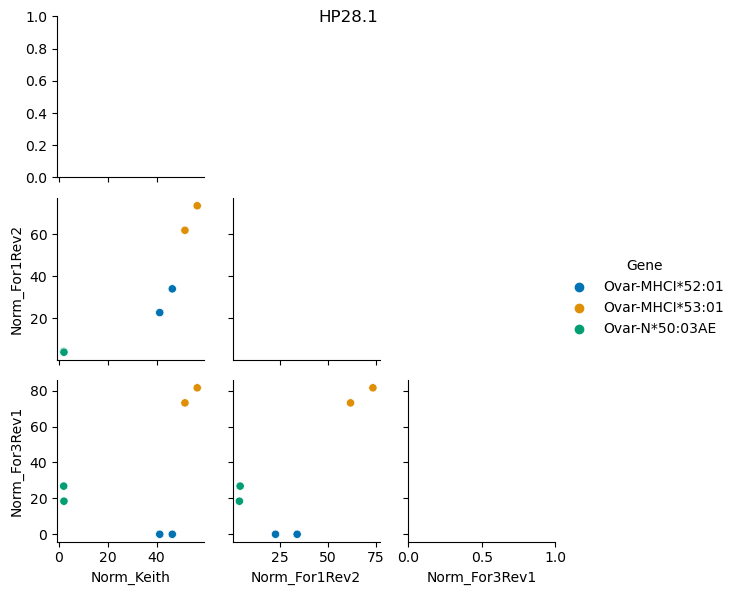

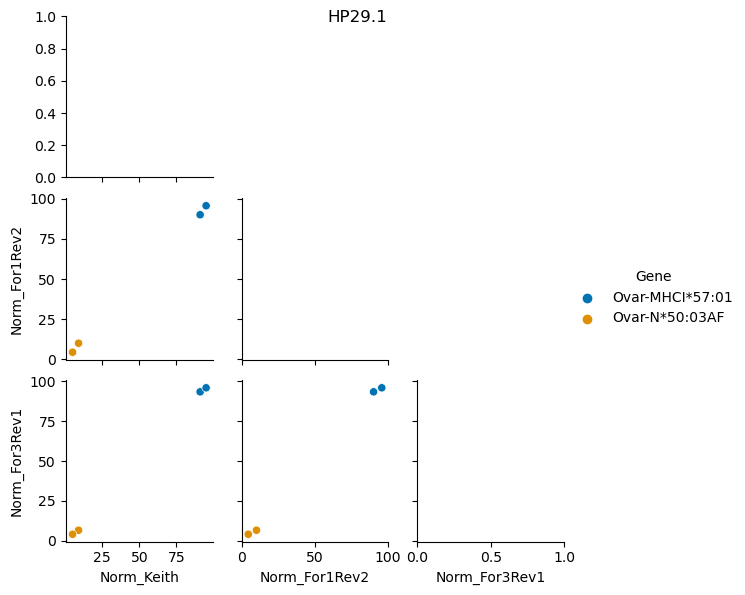

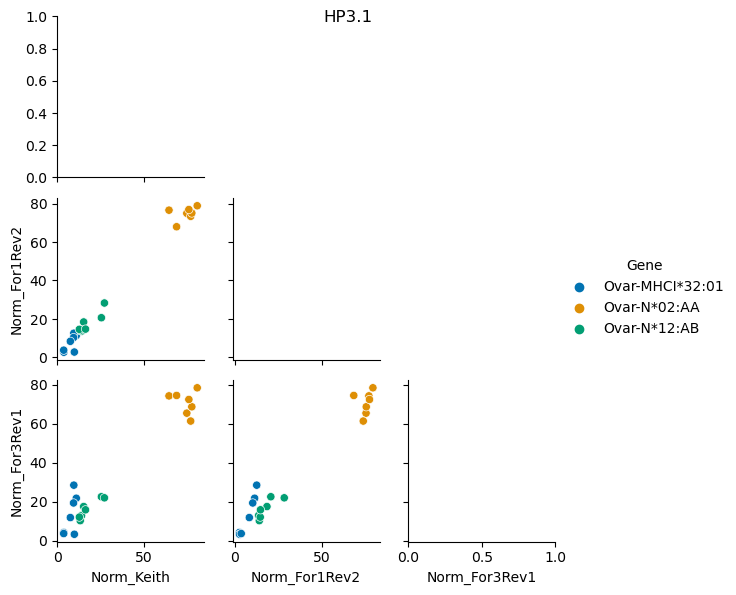

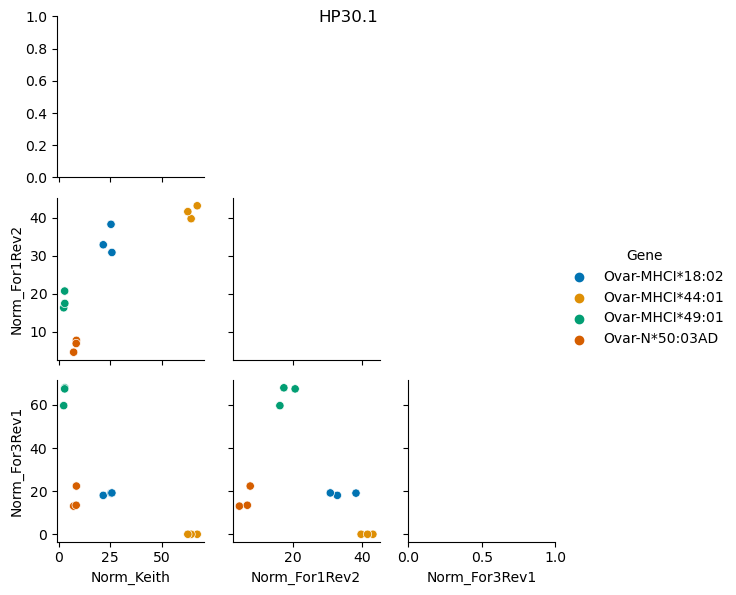

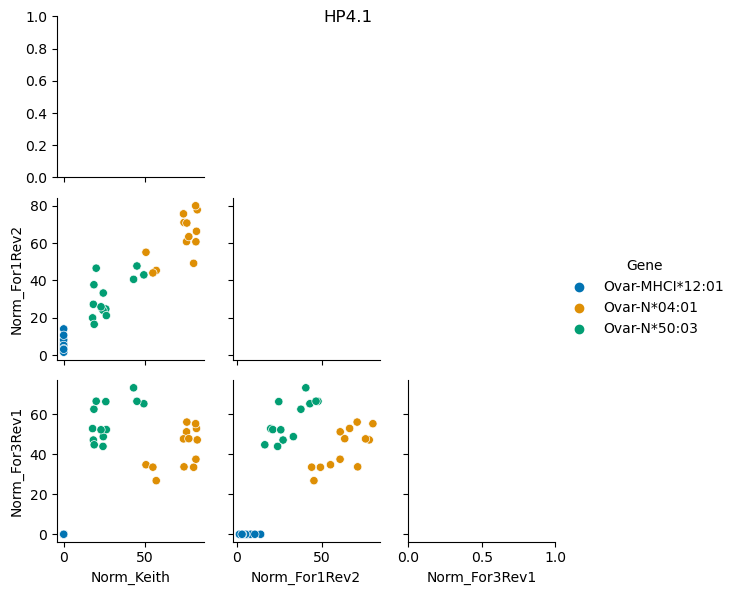

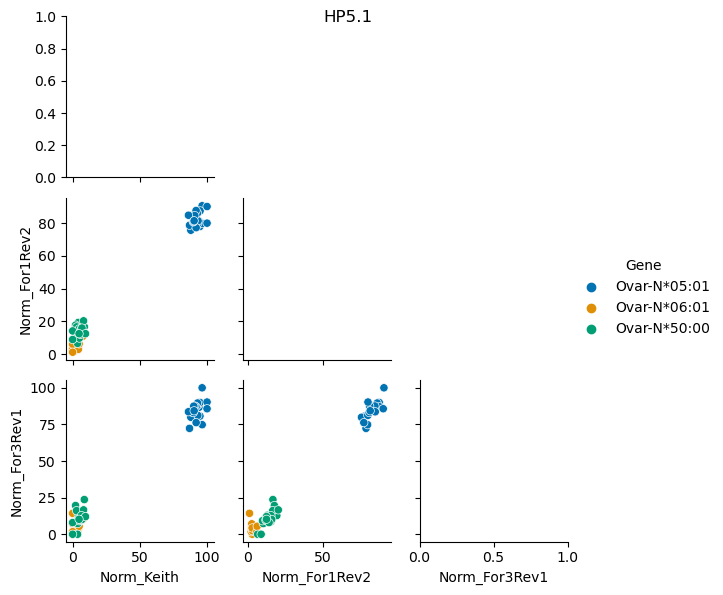

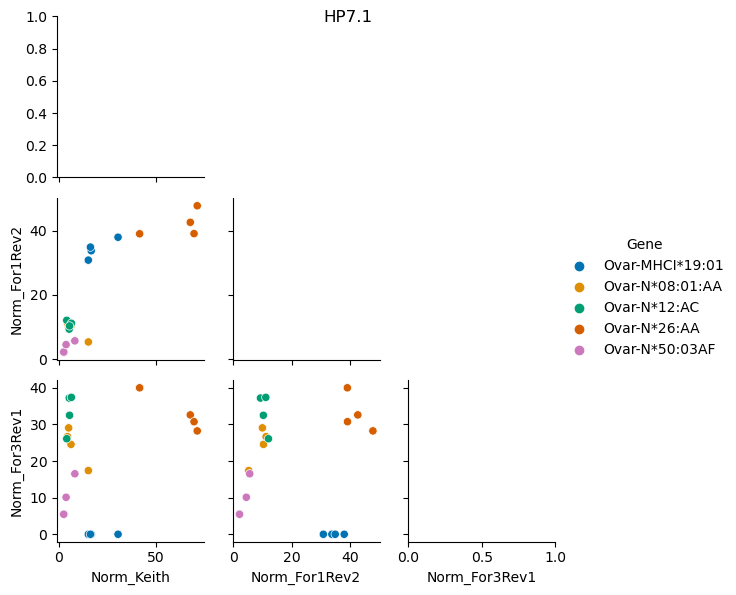

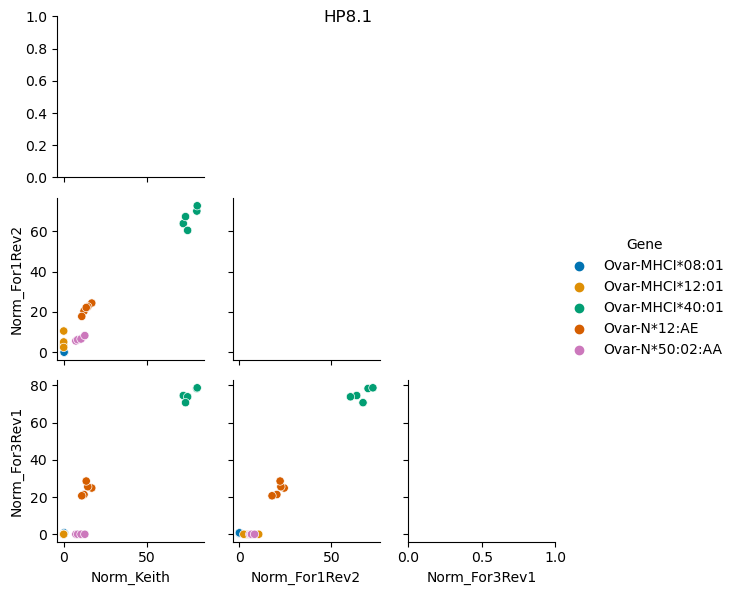

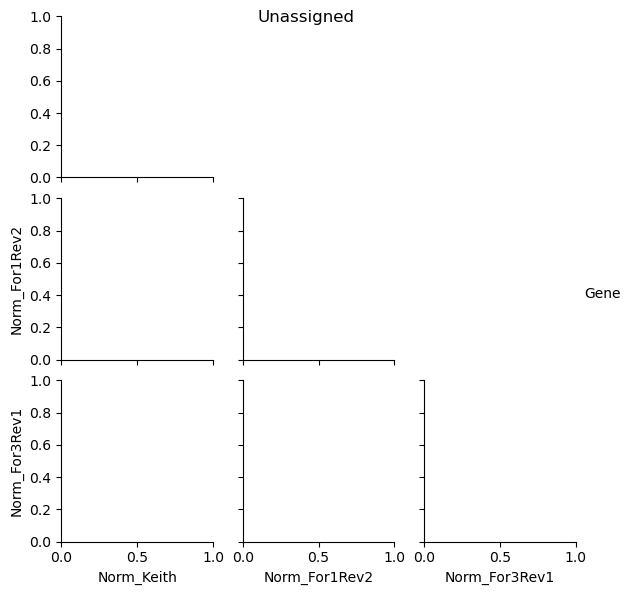

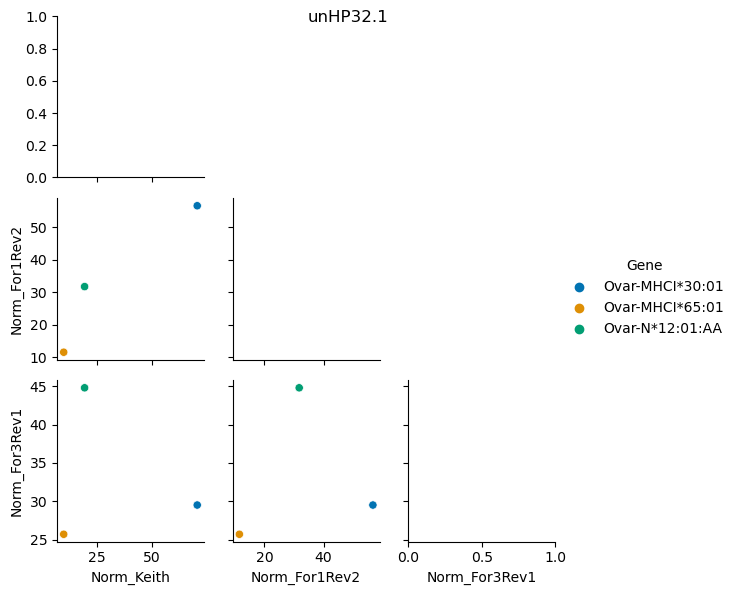

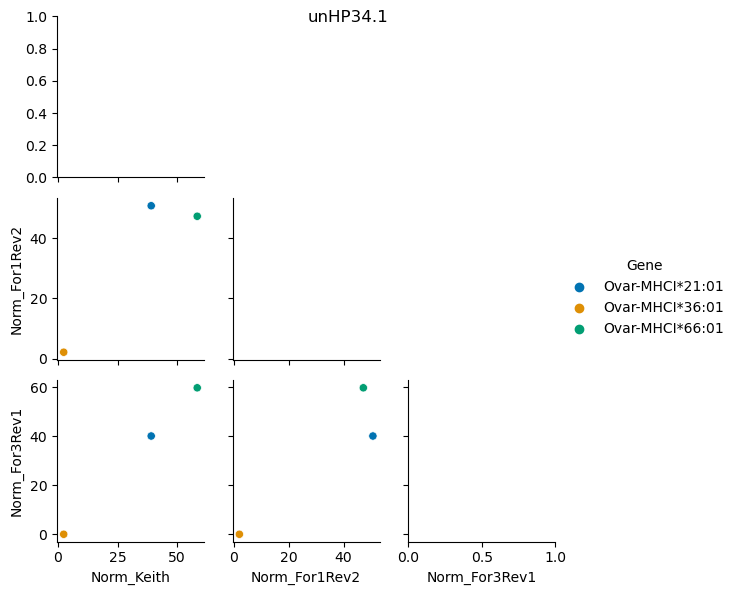

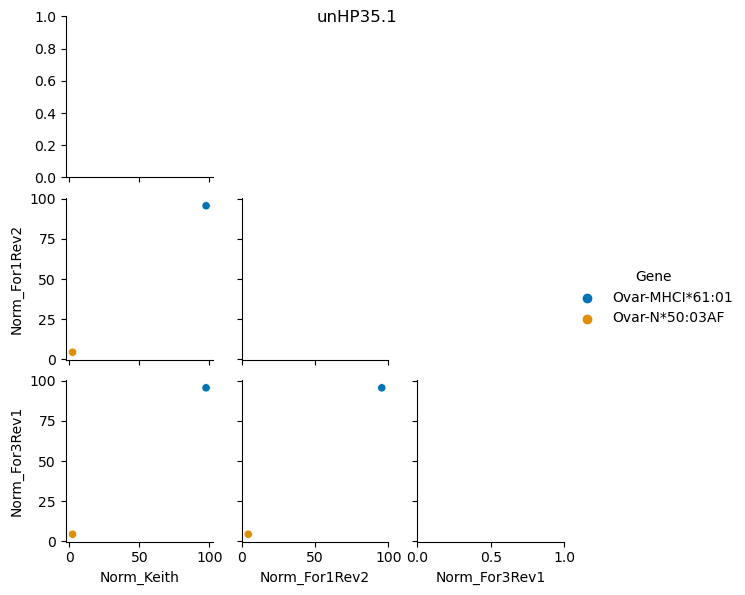

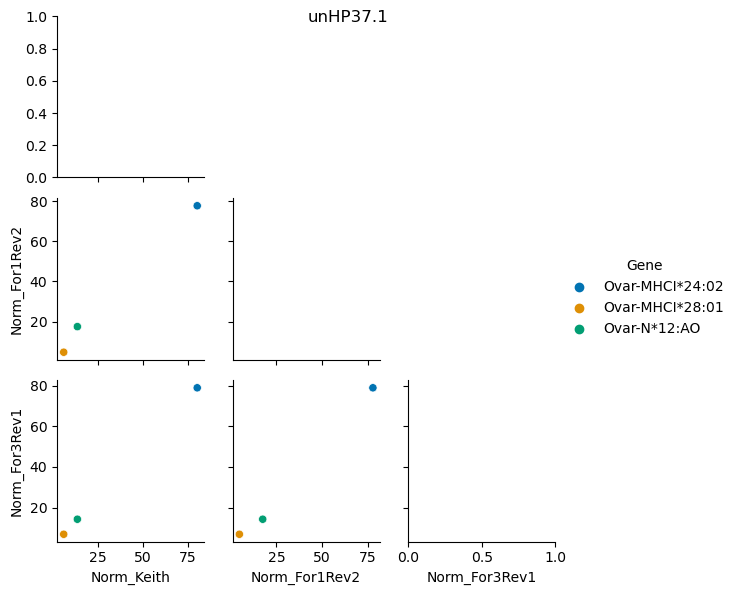

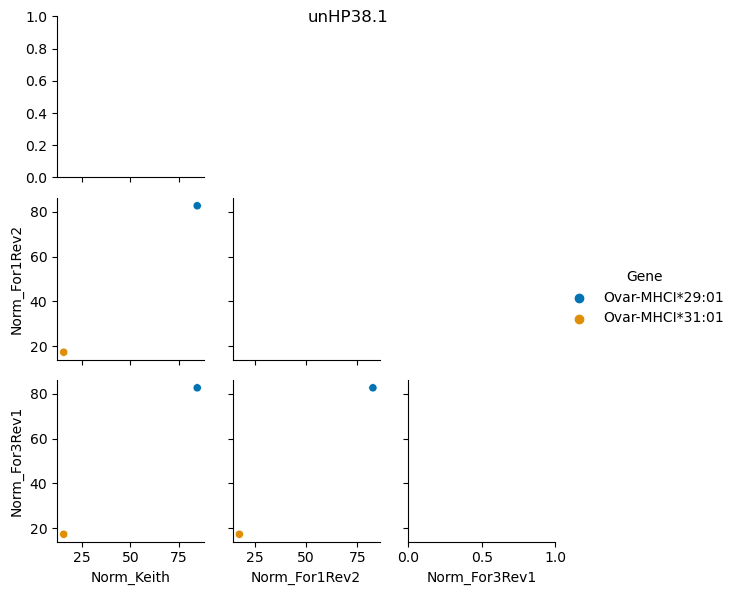

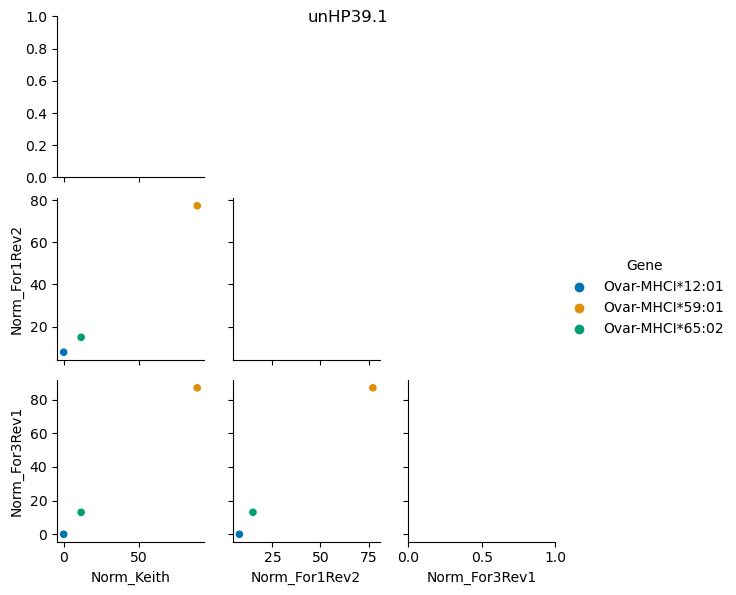

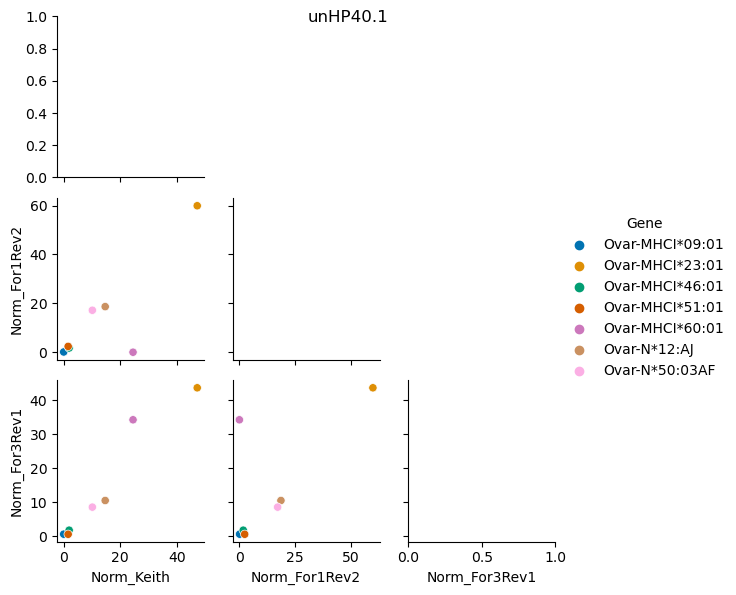

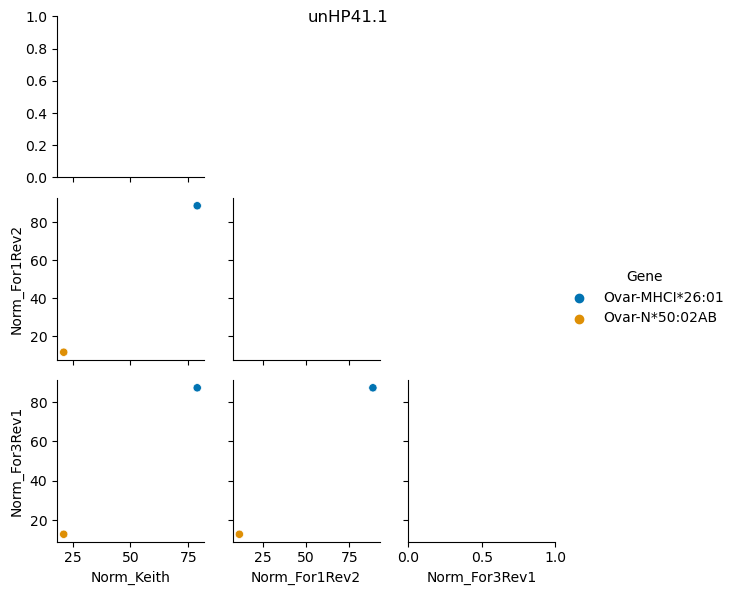

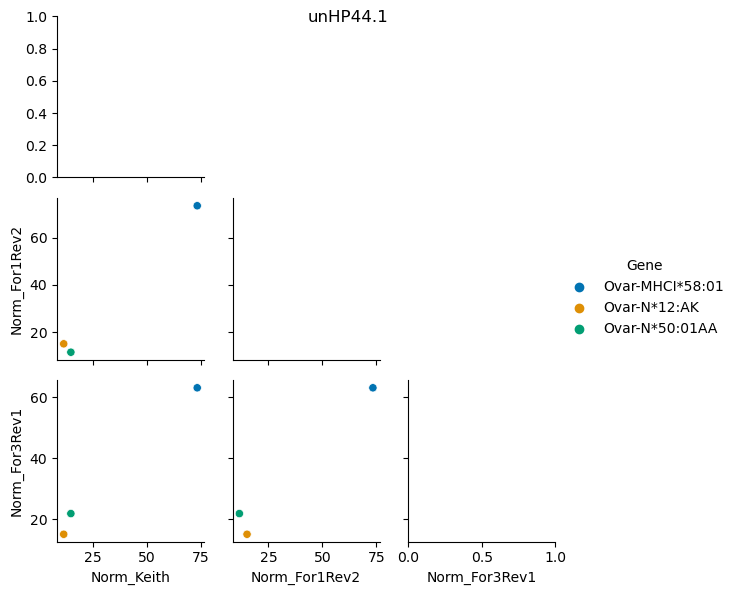

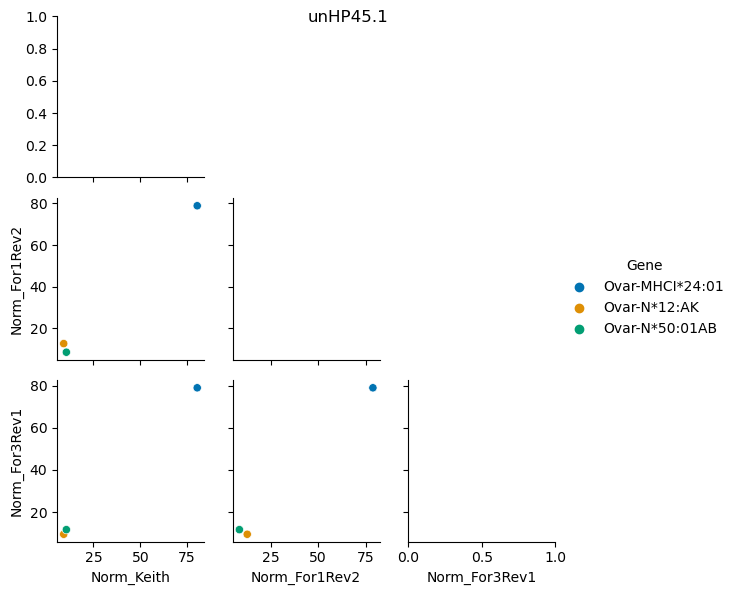

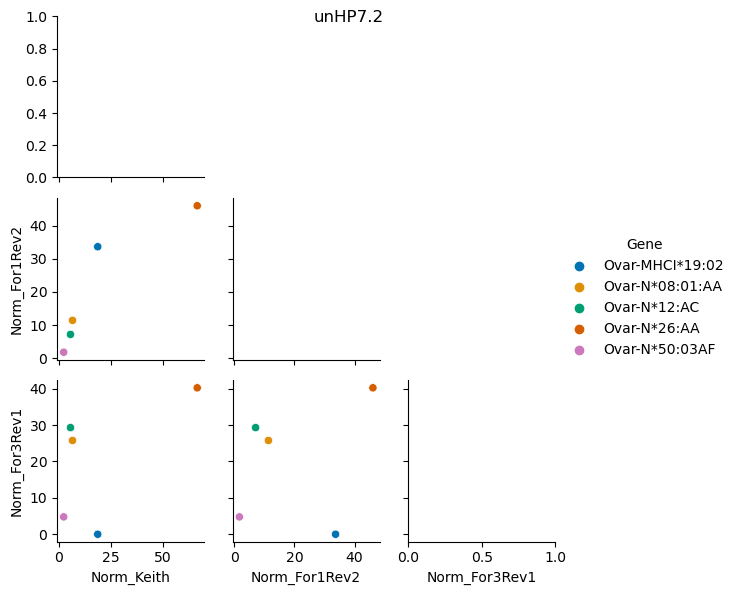

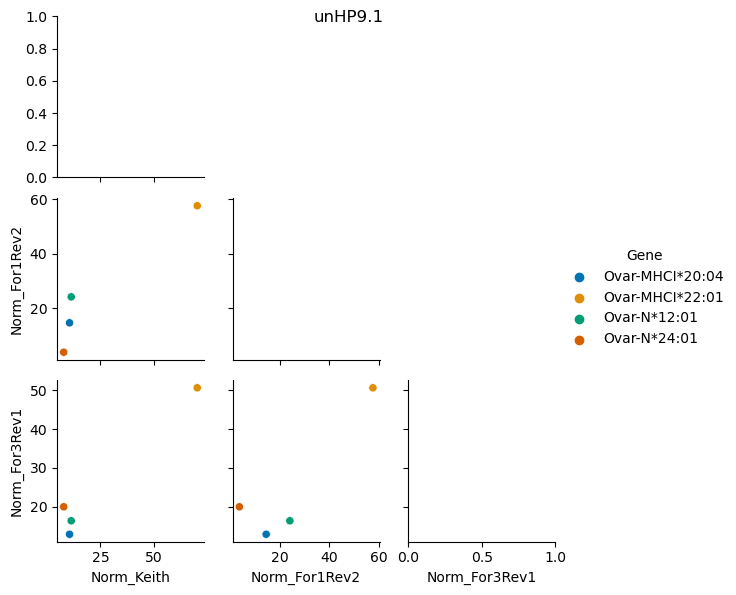

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def my_hist(x, label, color):
    ax0 = plt.gca()
    ax = ax0.twinx()
    
    sns.despine(ax=ax, left=True, top=True, right=False)
    ax.yaxis.tick_right()
    ax.set_ylabel('Counts')
    
    ax.hist(x, label=label, color=color, alpha=0.55, bins=20)

df = pd.read_csv("bf.mhcI.table.txt", sep="\t")
for i, j in df.groupby("Haplotype"):
    asdf = ["Norm_Keith", "Norm_For1Rev2", "Norm_For3Rev1"]
    temp_df = j[asdf].replace("-", np.nan).astype(float)
    temp_df = pd.concat([j[["Gene"]], temp_df], axis=1)
    g = sns.PairGrid(temp_df, hue="Gene", height=2, palette="colorblind", corner=True)
    # g.map_diag(sns.histplot, **{'bins': 20, 'alpha': 0.5})
    g.map_lower(sns.scatterplot)
    g.fig.suptitle(i)
    g.add_legend()
    # g.fig.savefig(f"images/{i}.png", dpi=300)

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def r2(x, y, ax=None, **kws):
    ax = ax or plt.gca()
    slope, intercept, r_value, p_value, std_err = linregress(x=x, y=y)
    ax.annotate(f'$r^2 = {r_value ** 2:.2f}$\nEq: ${slope:.2f}x{intercept:+.2f}$',
                xy=(.05, .95), xycoords=ax.transAxes, fontsize=8,
                color='darkred', backgroundcolor='#FFFFFF99', ha='left', va='top')

In [3]:
df.columns

Index(['Sample', 'DRB3_1', 'DRB3_2', 'Breed', 'Flock', 'Status', 'Haplotype',
       'Gene', '%haplotype counts in Keith', '%haplotype counts in For1Rev2',
       '%haplotype counts in For3Rev1', 'Keith_read_counts', 'Keith_read_%',
       'Keith_read_status', 'For1Rev2_read_counts', 'For1Rev2_read_%',
       'For1Rev2_read_status', 'For3Rev1_read_counts', 'For3Rev1_read_%',
       'For3Rev1_read_status', 'Norm_Keith', 'Norm_For1Rev2', 'Norm_For3Rev1'],
      dtype='object')